Section1





In [ ]:
# Section1 : Import libraries
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [ ]:
## Section 2: Loading the data
cancer =  pd.read_csv("/content/data.csv",index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.csv'

# New section

In [ ]:
# Section 3: Data Preprocessing
# Dropping the 'id' column
cancer.drop("id", axis=1, inplace= True)

# Encoding the 'diagnosis' column
LabelEncoder_y = LabelEncoder()
cancer.iloc[:,1] = LabelEncoder_y.fit_transform(cancer.iloc[:,1].values)




'we want to count values '

In [ ]:
# Section 4: Exploratory Data Analysis
# Visualizing the count of 'diagnosis' column
sns.countplot(cancer["diagnosis"], label = "count")

# Finding the correlation among columns and visualizing it
cor = cancer.iloc[:,1:12].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot= True, fmt=".0%")


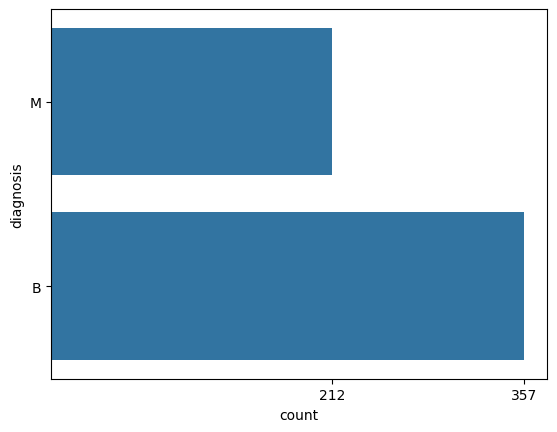

In [ ]:
# Section 5: Model Building
# Splitting the dataset into dependent (X) and independent (Y) variables
x = cancer.iloc[:,2:31].values
y = cancer.iloc[:,1].values

# Splitting the dataset into training and testing sets
x_train,x_test,y_train, y_test = train_test_split (x,y,test_size = 0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Function to build models
def models(x_train, y_train):
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)

    # Decision Tree
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(x_train, y_train)

    # Random Forest
    forest = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)
    forest.fit(x_train, y_train)

    # Printing the accuracy of each model
    print("[0]Logistic regression accuracy:", log.score(x_train, y_train))
    print("[1]Decision tree accuracy:", tree.score(x_train, y_train))
    print("[2]Random forest accuracy:", forest.score(x_train, y_train))

    return log, tree, forest

# Getting all of the models
model = models(x_train, y_train)



In [ ]:
# Section 6: Evaluating the models
for i in range(len(model)):
    print("Model ", i)
    print("Classification Report: ")
    print(classification_report(y_test, model[i].predict(x_test)))
    print("Accuracy Score: ", accuracy_score(y_test, model[i].predict(x_test)))

<ipython-input-6-fe5b83261be1>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cancer.iloc[:,1] = LabelEncoder_y.fit_transform(cancer.iloc[:,1].values)
